# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
OG_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_v1 = OG_combined.copy()
OG_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [168]:
# Checking the number of mice.
mice_list = OG_combined["Mouse ID"].unique()
mice_count = len(mice_list)
mice_count

249

In [169]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#COMBINED ID AND TIMEPOINT TO CHECK FOR DUPLICATES
combined_v1["Duplicate_Check"] = combined_v1["Mouse ID"] + " " + combined_v1["Timepoint"].astype(str)

#IDENTIFIED TRUE/FALSE FOR DUPLICATES
bool_duplicate = combined_v1["Duplicate_Check"].value_counts() >= 2
bool_duplicate_df = pd.DataFrame(bool_duplicate)
bool_duplicate_df["Mouse"] = bool_duplicate_df.index

duplicate_list = []
unique_list = []
x = 0
#LOOP TO SORT DUPLICATES INTO SEPARATE LIST
while x < len(bool_duplicate_df):
    if bool_duplicate_df["Duplicate_Check"][x] == True:
        duplicate_list.append(bool_duplicate_df["Mouse"][x])
        x = x + 1
    else:
        unique_list.append(bool_duplicate_df["Mouse"][x])
        x = x + 1

#DUPLICATES LIST FORMATTING
duplicate_df = pd.DataFrame(duplicate_list)
rename_dup_df = duplicate_df.rename(columns={0:"Mouse_ID"})

#SEPARATES ID AND TIME BACK INTO SEPARATE
#REFERENCED STACKOVERFLOW # 37333299
rename_dup_df[["Mouse_ID", "Time"]] = rename_dup_df["Mouse_ID"].astype(str).str.split(" ", expand=True)
duplicate = rename_dup_df["Mouse_ID"].unique()
duplicate

array(['g989'], dtype=object)

In [170]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_ID_list = OG_combined.loc[(OG_combined["Mouse ID"] == duplicate[0]), :]
Duplicate_ID_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [171]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = pd.DataFrame(OG_combined.loc[(OG_combined["Mouse ID"] != duplicate[0]), :])
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [172]:
# Checking the number of mice in the clean DataFrame.
clean_list = clean_mouse_study["Mouse ID"].unique()
clean_count = len(clean_list)
clean_count

248

## Summary Statistics

In [173]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_mean = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_median = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_variance = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_stddev = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_sem = clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
merge_01 = pd.merge(drug_mean, drug_median, on="Drug Regimen", how="outer")
merge_02 = pd.merge(drug_variance, drug_stddev, on="Drug Regimen", how="outer")
rename_01 = merge_01.rename(columns={"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median"})
rename_02 = merge_02.rename(columns={"Tumor Volume (mm3)_x": "Variance", "Tumor Volume (mm3)_y": "Std. Deviation"})
merge_03 = pd.merge(rename_01, rename_02, on="Drug Regimen", how="outer")
merge_04 = pd.merge(merge_03, drug_sem, on="Drug Regimen", how="outer")
summary_stats = merge_04.rename(columns={"Tumor Volume (mm3)": "SEM"})
summary_stats

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [174]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#REFERENCED JAMES LeDOUX
agg_summary_stats = clean_mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats_agg = agg_summary_stats.rename(columns={"var": "variance", "std": "std. deviation"})
summary_stats_agg

Tumor Volume (mm3)                                               
                           mean     median   variance std. deviation       sem
Drug Regimen                                                                  
Capomulin             40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479       8.134708  0.596466
Placebo               54.033581  52.288934  61.168083       7.821003  0.581331
Propriva              52.320930  50.446266  43.852013       6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355       6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen Volume'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

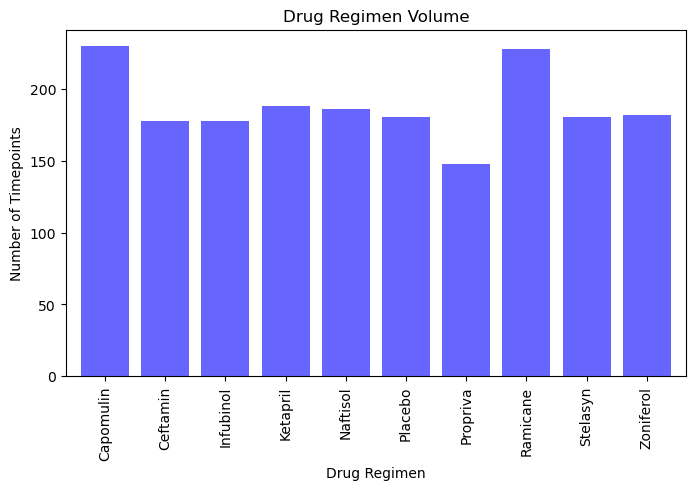

In [175]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_count = clean_mouse_study.groupby("Drug Regimen")["Timepoint"].count()
bar_count.plot(kind="bar", figsize=(8,4.5), title="Drug Regimen Volume", xlabel="Drug Regimen", ylabel="Number of Timepoints", 
            align="center", color="b", alpha=0.6, width=0.8, xlim=(-0.7, len(bar_count)-0.3))

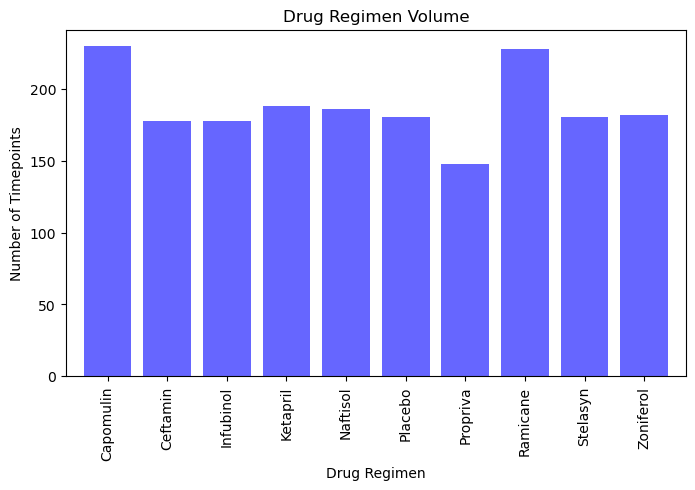

In [176]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(bar_count))
drug_names = bar_count.index
ticks = [value for value in x_axis]
plt.figure(figsize=(8,4.5))
plt.bar(x_axis, bar_count, color="b", alpha=0.6, align="center", width=0.8)
plt.xticks(ticks, drug_names, rotation="vertical")
plt.xlim(-0.7, len(x_axis)-0.3)
plt.title("Drug Regimen Volume")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

<Axes: title={'center': 'Study Mice by Sex'}>

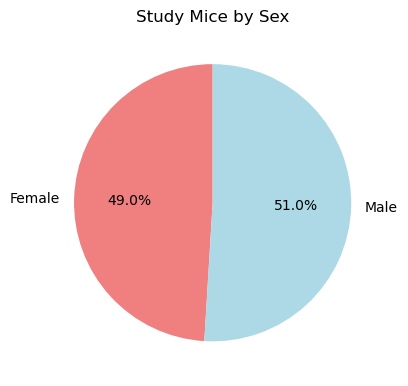

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#REFERENCED askpython.com
mouse_sex = clean_mouse_study.groupby("Sex")["Mouse ID"].count()
sexes = mouse_sex.index
colors = ["lightcoral", "lightblue"]
mouse_sex.plot.pie(title="Study Mice by Sex", figsize=(4.5,4.5), startangle=90, ylabel="", 
        colors=colors, labels=sexes, autopct='%1.1f%%')

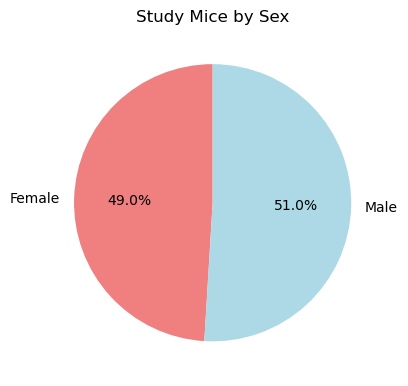

In [178]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(4.5,4.5))
plt.pie(mouse_sex, labels=sexes, colors=colors, autopct="%1.1f%%", startangle=90)
plt.title("Study Mice by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [179]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_top4 = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin") | (clean_mouse_study["Drug Regimen"] == "Ramicane") | 
                                   (clean_mouse_study["Drug Regimen"] == "Infubinol") | (clean_mouse_study["Drug Regimen"] == "Ceftamin")]
mice_list_02 = drugs_top4["Mouse ID"].unique()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(drugs_top4.groupby("Mouse ID")["Timepoint"].last())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_last_timepoint = pd.merge(drugs_top4, last_timepoint, on="Mouse ID", how="left")
top4_list = tumor_last_timepoint.loc[(tumor_last_timepoint["Timepoint_x"] == tumor_last_timepoint["Timepoint_y"])]
top4_list = top4_list[["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint_x", "Tumor Volume (mm3)", "Metastatic Sites"]]
last_timepoint_tumor_volume = top4_list.rename(columns={"Timepoint_x": "Timepoint"})
last_timepoint_tumor_volume = last_timepoint_tumor_volume.reset_index()
last_timepoint_tumor_volume = last_timepoint_tumor_volume[["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]]
last_timepoint_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [204]:
# Put treatments into a list for for loop (and later for plot labels)
tx_list_4drug = drugs_top4["Drug Regimen"].unique()
tx_list_4drug.sort()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
drug_df = []
ubound_list = []
lbound_list = []
outlier_list = []
no_outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_length = len(tx_list_4drug)

y = 0
for drug in tx_list_4drug:
    if y == drug_length:
        break
    # Locate the rows which contain mice on each drug and get the tumor volumes
    elif drug == tx_list_4drug[y]:
        #CREATES DATAFRAME FOR ONLY THE LAST TIMEPOINTS FOR THE SPECIFIED DRUG REGIMENS
        locate_drugs = pd.DataFrame(last_timepoint_tumor_volume.loc[(last_timepoint_tumor_volume["Drug Regimen"] == tx_list_4drug[y]), :])
        drug_tumor_vol = locate_drugs["Tumor Volume (mm3)"]
        #CREATES LIST TO USE FOR BOXPLOTS
        tumor_vol_list.append(locate_drugs["Tumor Volume (mm3)"])
        #CALCULATES BOUNDARIES
        quartiles = drug_tumor_vol.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        ubound = upperq + (1.5*iqr)
        lbound = lowerq - (1.5*iqr)
        #CREATES LIST FOR BOUNDARIES TO USE IN OUTLIERS LOOP
        ubound_list.append(ubound)
        lbound_list.append(lbound)
        #CREATES DATAFRAME FOR POSSIBLE OUTLIERS
        outlier_find = locate_drugs.loc[(locate_drugs["Tumor Volume (mm3)"] > ubound) | (locate_drugs["Tumor Volume (mm3)"] < lbound), :]
        if outlier_find.empty:
            no_outliers.append(locate_drugs["Drug Regimen"].unique())
        for drug in tx_list_4drug:
            if outlier_find.empty:
                continue
            else:
                outlier_list.append(outlier_find)
        y = y + 1
    else:
        y = y + 1

# Determine outliers using upper and lower bounds
#USES LISTS CREATED ABOVE TO DETERMINE OUTLIERS
no_outlier_df = pd.DataFrame(no_outliers)
outlier_df = pd.DataFrame(outlier_list[0])
outlier_df_index = outlier_df.set_index("Mouse ID")
print(f"There is a possible outlier with {outlier_df_index['Drug Regimen'][0]} at {outlier_df_index['Tumor Volume (mm3)'][0]} mm3.")
print(f"There are no suspected outliers for {no_outlier_df[0][0]}, {no_outlier_df[0][1]}, and {no_outlier_df[0][2]}.")

There is a possible outlier with Infubinol at 36.3213458 mm3.
There are no suspected outliers for Capomulin, Ceftamin, and Ramicane.


<function matplotlib.pyplot.show(close=None, block=None)>

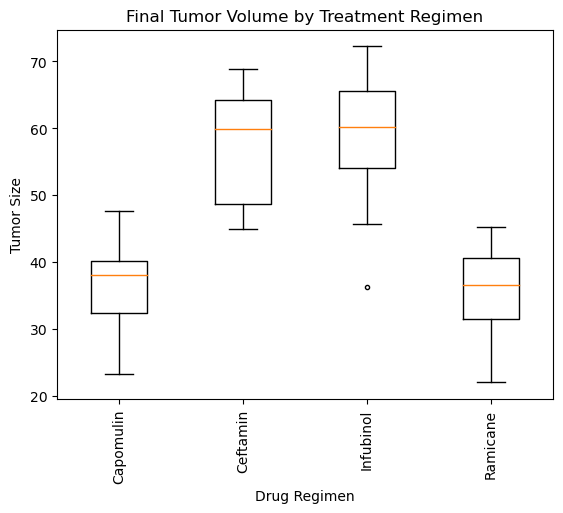

In [203]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x = [1, 2, 3, 4]
labels = tx_list_4drug
fig, ax = plt.subplots()
pos = np.arange(len(tumor_vol_list)) + 1
bp = ax.boxplot(tumor_vol_list, positions=pos)
ax.set_title("Final Tumor Volume by Treatment Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Size")
plt.setp(bp["whiskers"],color='k', linestyle='-')
plt.setp(bp["fliers"], markersize=3.0)
plt.xticks(x, labels, rotation="vertical")
plt.show

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
